#### This notebook helps to extract necessary information from the *.report* file and saves all the information in a csv file. Latter it takes csv file and finds the data points required to fit oxygen embedding functional

In [1]:
import sys
sys.path.append('/home/hbhattar/afs/Hemanta/metals/pythonScripts/function/')
import FDEAM as dream
from matplotlib import rcParams
import numpy as np
from collections import OrderedDict
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

params = {
    'font.family':'serif',
   'axes.labelsize': 14,
   'font.size': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   }
rcParams.update(params)



In [2]:
folder = "/home/hbhattar/groupspace/hbhattar/OxideLibraryNew/NewOxides/EmbedPlot/"

In [3]:
hexColor =['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', \
           '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', \
           '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', \
           '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

In [4]:
oxideName = ["Al2O3",
             "Co3O4",
             "CoO",
             "Cu2O",
             "CuO",
             "alpha-Fe2O3",
             "Fe3O4",
             "MgO",
             "MoO2",
             "Pb3O4",
             "PbO2",
             "red-PbO",
             "yellow-PbO",
             "TiO2-anatase",
             "TiO2-rutile",
             "Ti2O3",
             "Ti3O5",
             "TiO",
             "WO2",
             "WO3",
             "ZrO2",
            ]
Metals = {
    "Al":["Al2O3"],
    "Co":["Co3O4", "CoO"],
    "Cu":["Cu2O","CuO"],
    "Fe":["alpha-Fe2O3", "Fe3O4"],
    "Mg":["MgO"],
    "Mo":["MoO2"],
    "Pb":["Pb3O4", "PbO2", "red-PbO", "yellow-PbO"],
    "Ti":["TiO2-anatase", "TiO2-rutile", "Ti2O3", "Ti3O5", "TiO"],
    "W": ["WO2", "WO3"],
    "Zr":["ZrO2"]
}
shapeMetals = {
    "Al":"o",
    "Co":"+",
    "Cu":"^",
    "Fe":"*",
    "Mg":"<",
    "Mo":">",
    "Pb":"s",
    "Ti":"X",
    "W": "D",
    "Zr":"v",
    
}

colorMetals = {
    "Al":"r",
    "Co":"b",
    "Cu":"k",
    "Fe":'#1f77b4',
    "Mg":'#2ca02c',
    "Mo":'#d62728',
    "Pb":'#9467bd',
    "Ti":'#8c564b',
    "W": '#e377c2',
    "Zr":'indigo',
    
}
oxideLabel = {}
for index,nameOxide in enumerate(oxideName):
    oxideLabel[nameOxide] = chr(65+index)
print(oxideLabel)

{'Al2O3': 'A', 'Co3O4': 'B', 'CoO': 'C', 'Cu2O': 'D', 'CuO': 'E', 'alpha-Fe2O3': 'F', 'Fe3O4': 'G', 'MgO': 'H', 'MoO2': 'I', 'Pb3O4': 'J', 'PbO2': 'K', 'red-PbO': 'L', 'yellow-PbO': 'M', 'TiO2-anatase': 'N', 'TiO2-rutile': 'O', 'Ti2O3': 'P', 'Ti3O5': 'Q', 'TiO': 'R', 'WO2': 'S', 'WO3': 'T', 'ZrO2': 'U'}


In [5]:
Echo = {'Al2O3': 3.39,
 'Co3O4': 4.39,
 'CoO': 4.39,
 'Cu2O': 3.43,
 'CuO': 3.43,
 'alpha-Fe2O3': 4.28,
 'Fe3O4': 4.28,
 'MgO': 1.51,
 'MoO2': 6.82,
 'Pb3O4': 2.03,
 'PbO2': 2.03,
 'red-PbO': 2.03,
 'yellow-PbO': 2.03,
 'TiO2-anatase': 4.85,
 'TiO2-rutile': 4.85,
 'Ti2O3': 4.85,
 'Ti3O5': 4.85,
 'TiO': 4.85,
 'WO2': 8.9,
 'WO3': 8.9,
 'ZrO2': 6.29}

Ediss = 493.579 #kJ mol^-1

Enthalpy = {
     'Al2O3': 1663.608,
     'Co3O4': 896.309,
     'CoO': 238.056,
     'Cu2O': 168.952,
     'CuO': 153.807,
     'alpha-Fe2O3': 819.025,
     'Fe3O4': 1114.579,
     'MgO': 597.06,
     'MoO2': 582.903,
     'Pb3O4': 710.871,
     'PbO2': 269.874,
     'red-PbO': 217.297,
     'yellow-PbO': 216.08,
     'TiO2-anatase': 933.837,
     'TiO2-rutile': 939.87,
     'Ti2O3': 1512.287,
     'Ti3O5': 2446.057,
     'TiO': 539.668,
     'WO2': 584.745,
     'WO3': 837.259,
     'ZrO2': 1092.032,
}  #kj/mol


In [6]:

# no of oxygen in oxide
m = {'Al2O3': 3,
 'Co3O4': 4,
 'CoO': 1,
 'Cu2O': 1,
 'CuO': 1,
 'alpha-Fe2O3': 3,
 'Fe3O4': 4,
 'MgO': 1,
 'MoO2': 2,
 'Pb3O4': 4,
 'PbO2': 2,
 'red-PbO': 1,
 'yellow-PbO': 1,
 'TiO2-anatase': 2,
 'TiO2-rutile': 2,
 'Ti2O3': 3,
 'Ti3O5': 5,
 'TiO': 1,
 'WO2': 2,
 'WO3': 3,
 'ZrO2': 2,
    }


In [7]:

n ={
 'Al2O3': 2,
 'Co3O4': 3,
 'CoO': 1,
 'Cu2O': 2,
 'CuO': 1,
 'alpha-Fe2O3': 2,
 'Fe3O4': 3,
 'MgO': 1,
 'MoO2': 1,
 'Pb3O4': 3,
 'PbO2': 1,
 'red-PbO': 1,
 'yellow-PbO': 1,
 'TiO2-anatase': 1,
 'TiO2-rutile': 1,
 'Ti2O3': 2,
 'Ti3O5': 3,
 'TiO': 1,
 'WO2': 1,
 'WO3': 1,
 'ZrO2': 1
}

No_oxygen_sim_box = {
 'Al2O3': 2700,
 'Co3O4': 2048,
 'CoO': 1372,
 'Cu2O': 1024,
 'CuO': 20800,
 'alpha-Fe2O3': 3888,
 'Fe3O4': 2048,
 'MgO': 2048,
 'MoO2': 2156,
 'Pb3O4': 1280,
 'PbO2': 2352,
 'red-PbO': 768,
 'yellow-PbO': 1008,
 'TiO2-anatase': 2048,
 'TiO2-rutile': 2156,
 'Ti2O3': 3780,
 'Ti3O5': 2560,
 'TiO': 2048,
 'WO2': 3072,
 'WO3': 2400,
 'ZrO2': 28800,
}


In [8]:
U_sim = []
for oxides in oxideName:
    oxideFullPath = folder + oxides + "_MinChargeSamples.report"
    U_sim.append(dream.ReportExtractor(oxideFullPath,5)[0])
    

In [9]:
U_sim = abs(np.array(U_sim))

In [10]:
EnthalpyVal = np.array([*Enthalpy.values()]) * 0.23900574
mVal = np.array([*m.values()])
EdissVal = Ediss * 0.23900574
nVal = np.array([*n.values()])
EchoVal = np.array([*Echo.values()])* 23.0605
U_simVal = U_sim
NVal = np.array([*No_oxygen_sim_box.values()])/mVal


Embedded = (EnthalpyVal + mVal/2 * EdissVal + nVal * EchoVal - U_simVal / NVal) / mVal

In [11]:
NVal


array([  900.,   512.,  1372.,  1024., 20800.,  1296.,   512.,  2048.,
        1078.,   320.,  1176.,   768.,  1008.,  1024.,  1078.,  1260.,
         512.,  2048.,  1536.,   800., 14400.])

In [12]:
embedded_dict = {}
for pos in range(len(Embedded)):
    embedded_dict[oxideName[pos]] = -Embedded[pos]
    

In [13]:
embedded_dict

{'Al2O3': -82.16701299725888,
 'Co3O4': -43.582763212645006,
 'CoO': -44.657268839700606,
 'Cu2O': -46.45611923120998,
 'CuO': -29.840454846986944,
 'alpha-Fe2O3': -65.58076983915181,
 'Fe3O4': -64.31303799259501,
 'MgO': -79.83630732113,
 'MoO2': -28.633353429128505,
 'Pb3O4': -43.22553067161499,
 'PbO2': -44.67779673596034,
 'red-PbO': -47.40090235651,
 'yellow-PbO': -44.30834586299349,
 'TiO2-anatase': -67.59284149642002,
 'TiO2-rutile': -66.7039653010419,
 'Ti2O3': -49.54216941154448,
 'Ti3O5': -58.79301037016599,
 'TiO': -1.9904809848000014,
 'WO2': -44.733014352379996,
 'WO3': 1387.7581739727166,
 'ZrO2': -70.50061548134775}

In [18]:
densityAtO = {"Al2O3":26.0501,
             "Co3O4":18.52,#30.8708,
             "CoO":18.34,#30.5765,
             "Cu2O":16.0199,#14.7876,#24.64,
             "CuO":37.17,
             "alpha-Fe2O3":17.34,#16.32,#20.4094,
             "Fe3O4":18.93,#17.82,#21.5035,
             "MgO":24.0735,
             "MoO2":42.50,#28.3378,
             "Pb3O4":16.4981,
             "PbO2":16.8385,
             "red-PbO":16.9535,
             "yellow-PbO":17.2742,
             "TiO2-anatase":30.7926,
             "TiO2-rutile":31.7717,
             "Ti2O3":36.1634,
             "Ti3O5":33.8474,
             "TiO":50.9129,
             "WO2":40.1521,
             "WO3":86.974,
             "ZrO2":40.5837,
          }


In [19]:
embeddingEnergy = []
density = []
for pos in range(len(Embedded)):
    embeddingEnergy.append(embedded_dict[oxideName[pos]])
    density.append(densityAtO[oxideName[pos]])
density.append(0)
embeddingEnergy.append(0)
embeddingEnergy = np.array(embeddingEnergy)
density = np.array(density)

In [20]:
rho = np.arange(0,110,1)
ene = 604.155 * rho/95.0 *(rho/95.0 - 1)**3
ene1 = -0.0226606*(-1 + 2.99736*rho) - 0.0225091*(-1 + 2.99736*rho)**2 + 0.000151562*(-1 + 2.99736*rho)**3
ene2 = 265.182*(-1 + 0.0186463*rho) + 265.182*(-1 + 0.0186463*rho)**2
ene3 = -3.45013 * rho - 0.0010212 * rho**2 + 0.00132107 * rho**3
ene4 = -3.96413 * rho + 0.0458764 * rho**2 + 0.0000116652 * rho**4 
ene5 = -4.94466*rho + 0.0921997*rho**2
import matplotlib.pyplot as plt


fe = 95

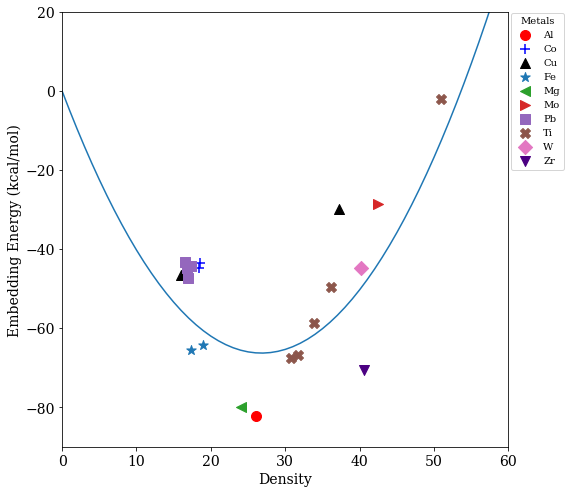

In [21]:
fig1 = plt.figure(num=None, figsize=(8,8))
ax1 =  fig1.add_subplot()
for metals in Metals.keys():
    for oxide in Metals[metals]:
        ax1.scatter(densityAtO[oxide],embedded_dict[oxide],s = 100,\
                    c = colorMetals[metals], marker=shapeMetals[metals],\
                label= metals)
ax1.set_xlabel("Density")
ax1.set_ylabel("Embedding Energy (kcal/mol)")


#addition anotation 
#for i, txt in enumerate(oxideName):
#    ax1.annotate(chr(i+65),(densityAtO[txt],embedded_dict[txt]),size=15)
    

ax1.set_ylim([-90,20])
ax1.set_xlim([0,60])
#ax1.set_title("E)

# adding legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.135, 1.01), prop={'size':10}, title ="Metals")
#plt.legend(by_label.values(), by_label.keys(), loc = 1)
#r"$ {} $".format(item[0])

#adding second legend

#h = [plt.plot([],[], color="black", marker="${}$".format(chr(i+65)), ms=10, ls="")[0] for i in range(len(oxideName))]
#leg = plt.legend(handles=h, labels=oxideName,loc=(0.1,1.1), title="Oxides", ncol = 5)
#ax1.add_artist(leg)




# adding legends
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.25, 1), prop={'size':20}, title ="Metals")

#fig1.savefig('embedding.pdf',bbox_inches='tight',pad_inches=0.2)




ax1.plot(rho,ene5)
fig1.savefig('embedding_with_fit5.pdf')
plt.show()

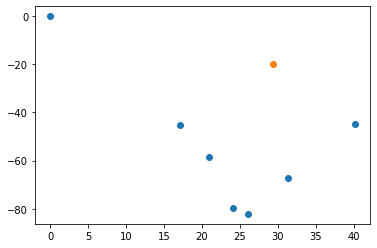

In [18]:
def Functional(rho,F0, rho0,c):
    return F0 *( (rho/rho0) * np.log(rho/rho0))


def poly(rho,a):
    out = 0
    for index,coeff in enumerate(a):
        out += a[index] * rho^(index+1)
        

In [19]:
from scipy.optimize import curve_fit
d,e=np.array([*densityAtO.values()]),np.array([*embedded_dict.values()])

In [34]:

with open(folder+"Energy.dat",'w') as f:
    for key in oxideName:
        f.write("%f\t%f\n"%(densityAtO[key],embedded_dict[key]))
            #print("%f\t%f\n"%(d[index],e[index]))

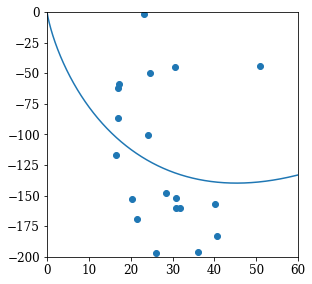

In [113]:
x = np.linspace(0.001,60,1000)
y = Functional(x,coeff[0],coeff[1],coeff[2])

fig,ax =  plt.subplots()
ax.scatter(d,e)
ax.set_xlim([0,60])
ax.set_ylim([-200,0])
ax.plot(x,y)

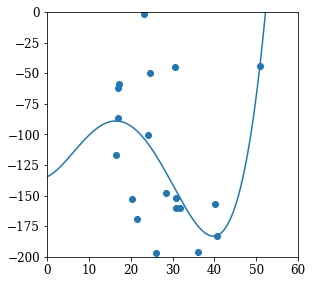

In [130]:
coeffPoly = np.polyfit(d[d<60],e[d<60],4)
func = np.poly1d(coeffPoly)

x = np.linspace(0.001,60,1000)
y = func(x)

fig,ax =  plt.subplots()
ax.scatter(d,e)
ax.set_xlim([0,60])
ax.set_ylim([-200,0])
ax.plot(x,y)

In [59]:
def formDictonary(keys,values):
    outDict = {}
    for index,key in enumerate(keys):
        outDict[key] = values[index]
    return outDict

In [60]:
formDictonary(oxideName,m)

{'Al2O3': 3,
 'Co3O4': 4,
 'CoO': 1,
 'Cu2O': 1,
 'CuO': 1,
 'alpha-Fe2O3': 3,
 'Fe3O4': 4,
 'MgO': 1,
 'MoO2': 2,
 'Pb3O4': 4,
 'PbO2': 2,
 'red-PbO': 1,
 'yellow-PbO': 1,
 'TiO2-anatase': 2,
 'TiO2-rutile': 2,
 'Ti2O3': 3,
 'Ti3O5': 5,
 'TiO': 1,
 'WO2': 2,
 'WO3': 3,
 'ZrO2': 2}

In [70]:
good_data = ['Al2O3','Co3O4','CoO','Cu2O','CuO','alpha-Fe2O3','Fe3O4','MgO','MoO2','Pb3O4','PbO2','red-PbO',\
            'yellow-PbO','TiO2-anatase','TiO2-rutile','Ti2O3','Ti3O5','TiO']
e = [0]
d = [0]
for mol in good_data:
    e.append(embedded_dict[mol])
    d.append(densityAtO[mol])
e.append(0)
d.append(90)

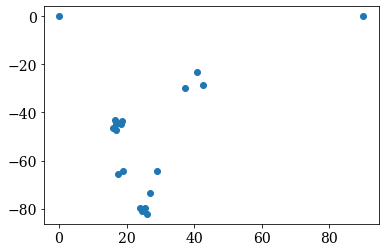

In [71]:
plt.plot(d,e,'o')

In [87]:
from scipy.optimize import curve_fit
d,e=np.array([d,e])
dnew = d/90-1

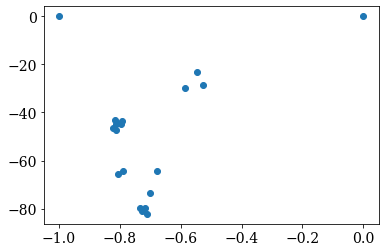

In [89]:
plt.plot(dnew,e,'o')

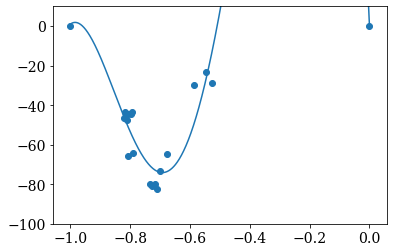

In [106]:
coeffPoly = np.polyfit(dnew,e,4)
func = np.poly1d(coeffPoly)
x = np.linspace(-1,0,1000)
y = func(x)
fig,ax =  plt.subplots()
ax.scatter(dnew,e)
#ax.set_xlim([-1,1.3])
ax.set_ylim([-100,10])
ax.plot(x,y)

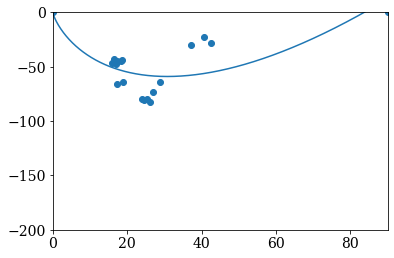

In [112]:
def Functional(rho,F0, rho0,c):
    return F0 *( (rho/rho0) * np.log(rho/rho0))
from scipy.optimize import curve_fit
d,e=np.array([d,e])
d[0] = 0.001
e[0] = 0.001
coeff,var = curve_fit(Functional,d,e)
x = np.linspace(0.001,90,1000)
y = Functional(x,coeff[0],coeff[1],coeff[2])

fig,ax =  plt.subplots()
ax.scatter(d,e)
ax.set_xlim([0,90])
ax.set_ylim([-200,0])
ax.plot(x,y)

In [110]:
coeff,var

(array([160.33007327,  83.73084131,   1.        ]), array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

In [60]:
e

array([  0.        , -82.167013  , -43.58276321, -44.65726884,
       -46.45611923, -29.84045485, -65.58076984, -64.31303799,
       -79.83630732, -28.63335343, -43.22553067, -44.67779674,
       -47.40090236, -44.30834586, -80.9155954 , -79.78049591,
       -64.47206359, -73.29418225, -23.01587161])